<a href="https://colab.research.google.com/github/sobyeol/BigData/blob/master/%EC%9D%B4%EC%A7%84%EB%B6%84%EB%A5%98_30%EB%8C%80(%EA%B5%AC).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
filename = '/content/drive/My Drive/Colab Notebooks/dataset/prefer_gu_logistic.csv'

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [19]:
filename = '/content/drive/My Drive/Colab Notebooks/dataset/prefer_gu_logistic.csv'
data = pd.read_csv(filename)

In [22]:
# 공백 행 제거

data = data.drop(data.index[[16, 17]])

In [34]:
data = data.drop(['Unnamed: 20'], axis=1)
# Pass a single list of column labels to drop

In [35]:
data

,prefer,price,hospital,bus,air,convenience,subway,department,office_dong,office_gu,bigmart,kindergarten,library,park,school,bank,senior
0,0.0,1.306,0.020,0.064,0.045,0.023,0.00,0.000,0.034,0.000,0.009,0.065,0.030,0.096,0.029,0.067,0.024
1,1.0,1.059,0.073,0.060,0.052,0.088,0.08,0.111,0.060,0.111,0.051,0.051,0.108,0.047,0.086,0.050,0.047
2,0.0,1.186,0.020,0.099,0.033,0.071,0.02,0.000,0.034,0.000,0.043,0.092,0.054,0.176,0.073,0.029,0.115
3,1.0,0.998,0.066,0.075,0.094,0.078,0.06,0.000,0.052,0.111,0.060,0.081,0.054,0.053,0.089,0.069,0.064
4,0.0,1.016,0.040,0.034,0.051,0.031,0.05,0.111,0.034,0.000,0.034,0.021,0.048,0.016,0.035,0.043,0.037
5,1.0,0.739,0.101,0.079,0.084,0.072,0.11,0.111,0.078,0.111,0.085,0.066,0.042,0.057,0.083,0.088,0.070
6,1.0,0.871,0.168,0.092,0.108,0.140,0.10,0.111,0.095,0.000,0.077,0.095,0.102,0.073,0.118,0.131,0.126
7,1.0,1.151,0.070,0.066,0.035,0.059,0.13,0.000,0.043,0.000,0.068,0.101,0.048,0.102,0.077,0.055,0.071
8,0.0,1.122,0.047,0.060,0.057,0.058,0.06,0.000,0.060,0.000,0.068,0.059,0.066,0.048,0.051,0.062,0.061
9,1.0,1.409,0.084,0.099,0.074,0.081,0.12,0.000,0.069,0.222,0.085,0.097,0.114,0.068,0.099,0.076,0.097


In [36]:
data['prefer'].value_counts(sort=False)

prefer
0.0    8
1.0    8
Name: count, dtype: int64

In [37]:
print(data.shape)

(16, 17)


In [44]:
X = data[data.columns[1:]]
print(X.shape)

y = data[['prefer']]
print(y.shape)

(16, 16)
(16, 1)


In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [46]:
print(y_train.mean())
print(y_test.mean())

prefer    0.5
dtype: float64
prefer    0.5
dtype: float64


##훈련 데이터 정규화

In [47]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler_minmax=MinMaxScaler()
scaler_standard=StandardScaler()

In [48]:
scaler_minmax.fit(X_train)
X_scaled_minmax_train=scaler_minmax.transform(X_train)
pd.DataFrame(X_scaled_minmax_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.0000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,0.511792,0.338172,0.611423,0.382222,0.406168,0.512821,0.222222,0.363248,0.2500,0.261089,0.547276,0.380952,0.342424,0.492063,0.438017,0.465339
std,0.327835,0.280579,0.327177,0.317685,0.281939,0.346089,0.295875,0.335894,0.3371,0.257584,0.336363,0.356926,0.273131,0.324708,0.311349,0.349905
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.246631,0.141935,0.325843,0.150000,0.139764,0.269231,0.000000,0.086538,0.0000,0.137097,0.310096,0.142857,0.163636,0.202381,0.252066,0.196903
50%,0.511456,0.332258,0.617978,0.280000,0.460630,0.576923,0.166667,0.333333,0.0000,0.189516,0.552885,0.250000,0.312121,0.590476,0.351240,0.402655
75%,0.739892,0.469355,0.921348,0.580000,0.549213,0.788462,0.333333,0.589744,0.5000,0.318548,0.841346,0.589286,0.478788,0.719048,0.570248,0.783186
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##테스트 데이터 정규화

In [49]:
X_scaled_minmax_test=scaler_minmax.transform(X_test)
pd.DataFrame(X_scaled_minmax_test).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,0.535040,0.262903,0.528090,0.420000,0.342520,0.384615,0.083333,0.365385,0.375,0.223790,0.451923,0.392857,0.216667,0.407143,0.421488,0.360619
std,0.308122,0.118421,0.154333,0.504146,0.173169,0.266469,0.166667,0.554354,0.250,0.107216,0.206526,0.188982,0.038130,0.221228,0.115506,0.135444
min,0.172507,0.116129,0.382022,-0.253333,0.102362,0.000000,0.000000,-0.217949,0.000,0.068548,0.201923,0.214286,0.163636,0.209524,0.256198,0.159292
25%,0.377695,0.193548,0.424157,0.176667,0.291339,0.346154,0.000000,0.118590,0.375,0.198589,0.360577,0.267857,0.209091,0.302381,0.386364,0.345133
50%,0.529650,0.280645,0.500000,0.560000,0.377953,0.461538,0.000000,0.282051,0.500,0.258065,0.451923,0.357143,0.224242,0.347619,0.458678,0.415929
75%,0.686995,0.350000,0.603933,0.803333,0.429134,0.500000,0.083333,0.528846,0.500,0.283266,0.543269,0.482143,0.231818,0.452381,0.493802,0.431416
max,0.908356,0.374194,0.730337,0.813333,0.511811,0.615385,0.333333,1.115385,0.500,0.310484,0.701923,0.642857,0.254545,0.723810,0.512397,0.451327


##모델 학습

In [64]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_scaled_minmax_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [51]:
pred_train = model.predict(X_scaled_minmax_train)
model.score(X_scaled_minmax_train, y_train)

1.0

In [52]:
#테스트 데이터 모델
pred_test=model.predict(X_scaled_minmax_test)
model.score(X_scaled_minmax_test, y_test)

0.75

##실제 데이터와 검증

In [77]:
#강서구 데이터(비선호지역 0이 나와야한다.)
gangseo = [1.306,	0.02,	0.064,	0.045,	0.023,	0,	0,	0.034,	0,	0.009,	0.065,	0.03,	0.096,	0.029,	0.067,	0.024]

#금정구 데이터(선호지역 1이 나와야한다.)
geumjeong = [1.059,	0.073,	0.06,	0.052,	0.088,	0.08,	0.111,	0.06,	0.111,	0.051,	0.051,	0.108,	0.047,	0.086,	0.05,	0.047]

#기장군 데이터(비선호지역 0이 나와야한다.)
gijang = [1.186,	0.02,	0.099,	0.033,	0.071,	0.02,	0,	0.034,	0,	0.043,	0.092,	0.054,	0.176,	0.073,	0.029,	0.115]

#남구 데이터(선호지역 1이 나와야한다.)
nam = [0.998,	0.066,	0.075,	0.094,	0.078,	0.06,	0,	0.052,	0.111,	0.06,	0.081,	0.054,	0.053,	0.089,	0.069,	0.064]

In [78]:
# prompt: 모델에 gangseo 데이터를 넣어서 검증하고싶어

gangseo_scaled = scaler_minmax.transform([gangseo])
gangseo_result = model.predict(gangseo_scaled)

print(gangseo_result)

geumjeong_scaled = scaler_minmax.transform([geumjeong])
geumjeong_result = model.predict(geumjeong_scaled)

print(geumjeong_result)

gijang_scaled = scaler_minmax.transform([gijang])
gijang_result = model.predict(gijang_scaled)

print(gijang_result)

nam_scaled = scaler_minmax.transform([nam])
nam_result = model.predict(nam_scaled)

print(nam_result)


[0.]
[1.]
[0.]
[1.]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


##검증 결과 시각화

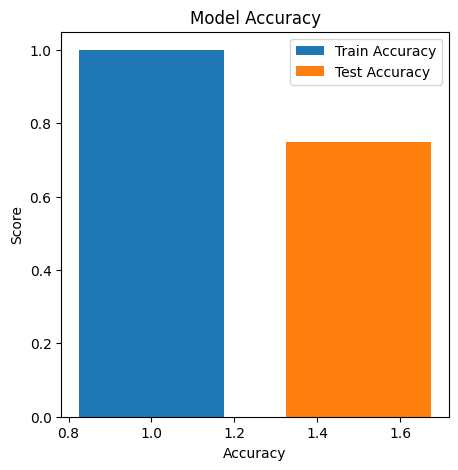

In [66]:
results = model.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, results)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Confusion Matrix")
plt.show()


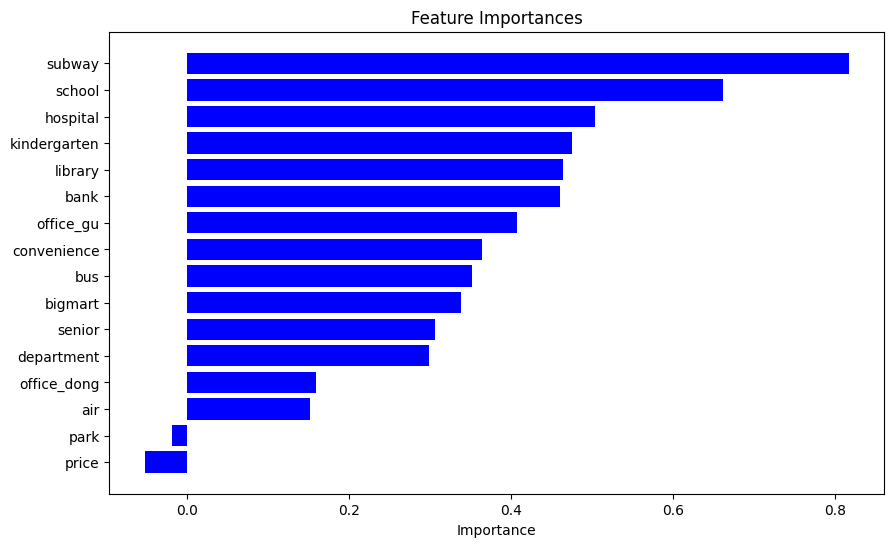

In [80]:
# prompt: 모델의 판단을 시각화해서 보고싶어

# Create a bar chart of the feature importances
importances = model.coef_.flatten()
features = X.columns

indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.barh(range(len(features)), importances[indices], color="blue", align="center")
plt.yticks(range(len(features)), features[indices])
plt.xlabel("Importance")
plt.show()